# Overview of the train and test set of NSL-KDD
Overview inclues
1. dataset size
2. dataset feature types
3. missing values in the dataset
4. Unique Categorical Features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import functools

In [2]:
train_set = pd.read_csv("../../../data/raw/NSL-KDD/KDDTrain+.csv")
test_set = pd.read_csv("../../../data/raw/NSL-KDD/KDDTest+.csv")

In [3]:
train_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


## Dataset Size

In [4]:
print("Train set shape (rows, columns)")
print(train_set.shape)
print("test set shape (rows, columns)")
print(test_set.shape)

Train set shape (rows, columns)
(125972, 42)
test set shape (rows, columns)
(22543, 42)


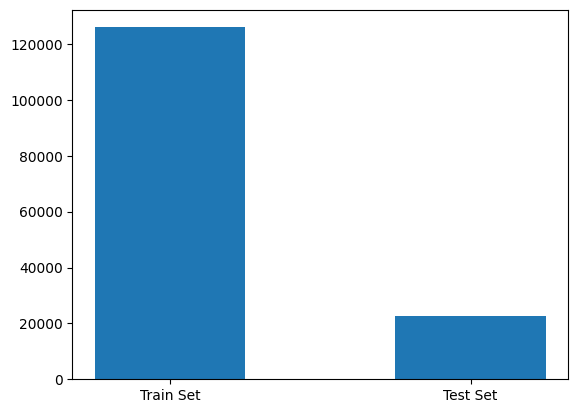

In [5]:
x_values = ["Train Set", "Test Set"]
y_values = [train_set.shape[0], test_set.shape[0]]
plt.bar(x_values, y_values, width=0.5)
plt.show()

### Total number of rows

In [6]:
combined_dataset = pd.concat([train_set, test_set])
print(f"Total number of rows is {format(combined_dataset.shape[0],',d')}")

Total number of rows is 148,515


## Dataset datatypes

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

## Checking for null values of both train and test set

In [8]:
train_set.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
test_set.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There are no missing values in the dataset

## Unique Categorical Values

### Unqiue values of NSL-KDD dataset

In [10]:
unique_values = combined_dataset.select_dtypes(include=["object"])
unique_values.head()

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


In [11]:
print("protocol_type: ")
unique_values_prtcl_type = unique_values["protocol_type"].unique().tolist()
print(f"Unique Values: {unique_values_prtcl_type}")
print(f"Unique Values Count: {len(unique_values_prtcl_type)}")
print("")
print("service: ")
unique_values_service = unique_values["service"].unique().tolist()
print(f"Unique Values: {unique_values_service}")
print(f"Unique Values Count: {len(unique_values_service)}")
print("")
print("flag: ")
unique_values_flag = unique_values["flag"].unique().tolist()
print(f"Unique Values: {unique_values_flag}")
print(f"Unique Values Count: {len(unique_values_flag)}")
print("")
print("attack: ")
unique_values_attack = unique_values["attack"].unique().tolist()
print(f"Unique Values: {unique_values_attack}")
print(f"Unique Values Count: {len(unique_values_attack)}")
print("")

protocol_type: 


Unique Values: ['udp', 'tcp', 'icmp']
Unique Values Count: 3

service: 
Unique Values: ['other', 'private', 'http', 'remote_job', 'ftp_data', 'name', 'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois', 'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i', 'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest']
Unique Values Count: 70

flag: 
Unique Values: ['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH']
Unique Values Count: 11

attack: 
Unique Values: ['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep'

Distribution of different attack categories:
- Denial of Service (Dos)
    - Apache2, Smurf, Neptune, Back, Teardrop, Pod, Land, Mailbomb, Processtable, UDPstorm
- Remote to Local (R2L)
    - WarezClient, Guess_Password, WarezMaster, Imap, Ftp_write, Named, MultiHop, Phf, Spy, Sendmail, SnmpGetAttack, SnmpGuess, Worm, Xsnoop, Xlock
- User to Root (U2R)
    - Buffer_Overflow, Httptuneel, Rootkit, LoadModule, Perl, Xterm, Ps, SQLattack
- Probe 
    - Satan, Saint, Ipsweep, Portsweep, Nmap, Mscan

In [12]:
def count_value_sum(dataframe, feature: str, iterable: list, initializer: int = 0):
    count = initializer
    for value in iterable:
        if value in dataframe[feature].values:
            count = dataframe[feature].value_counts()[value].item() + count
    return count

Normal Count: 77,053
DoS Count: 53,384
U2R Count: 252
R2L Count: 2,857
Probe Count: 14,077


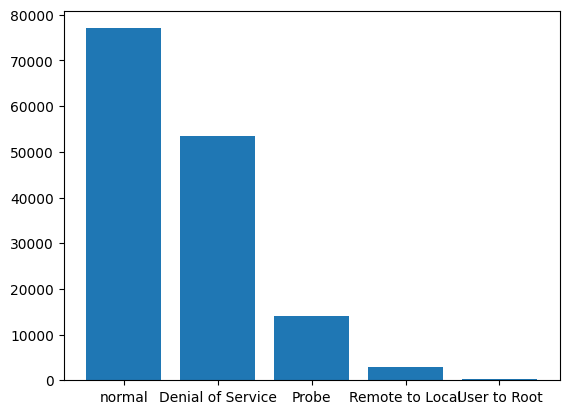

In [13]:
total_dos_count = count_value_sum(
    unique_values,
    "attack",
    [
        "smurf",
        "apache2",
        "neptune",
        "back",
        "teardrop",
        "land",
        "pod",
        "udpstorm",
        "processtable",
        "mailbomb",
    ],
)
total_r2l_count = count_value_sum(
    unique_values,
    "attack",
    [
        "warezmaster",
        "xlock",
        "snmpgetattack",
        "ftp_write",
        "phf",
        "imap",
        "xsnoop",
        "guess_passwd",
        "sendmail",
        "worm",
        "snmpguess",
        "named",
        "multihop",
    ],
)
total_u2r_count = count_value_sum(
    unique_values,
    "attack",
    [
        "rootkit",
        "buffer_overflow",
        "httptunnel",
        "perl",
        "sqlattack",
        "loadmodule",
        "ps",
        "xterm",
    ],
)
total_probe_count = count_value_sum(
    unique_values,
    "attack",
    [
        "saint",
        "mscan",
        "nmap",
        "satan",
        "ipsweep",
        "portsweep",
    ],
)
total_normal_count = unique_values["attack"].value_counts()["normal"].item()
attack_distribution_count = [
    total_normal_count,
    total_dos_count,
    total_probe_count,
    total_r2l_count,
    total_u2r_count,
]
attack_distribution_categories = [
    "normal",
    "Denial of Service",
    "Probe",
    "Remote to Local",
    "User to Root",
]
print(f"Normal Count: {format(total_normal_count,',d')}")
print(f"DoS Count: {format(total_dos_count,',d')}")
print(f"U2R Count: {format(total_u2r_count,',d')}")
print(f"R2L Count: {format(total_r2l_count,',d')}")
print(f"Probe Count: {format(total_probe_count,',d')}")
plt.bar(attack_distribution_categories, attack_distribution_count)
plt.show()

### Unique values of test set

In [14]:
unique_test_set = test_set.select_dtypes(include=["object"])
unique_test_set.head()

,protocol_type,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,ftp_data,SF,normal
2,icmp,eco_i,SF,saint
3,tcp,telnet,RSTO,mscan
4,tcp,http,SF,normal


In [15]:
print("protocol_type: ")
unique_test_set_values_prtcl_type = unique_test_set["protocol_type"].unique().tolist()
print(f"Unique Values: {unique_test_set_values_prtcl_type}")
print(f"Unique Values Count: {len(unique_test_set_values_prtcl_type)}")
print("")
print("service: ")
unique_test_set_values_service = unique_test_set["service"].unique().tolist()
print(f"Unique Values: {unique_test_set_values_service}")
print(f"Unique Values Count: {len(unique_test_set_values_service)}")
print("")
print("flag: ")
unique_test_set_values_flag = unique_test_set["flag"].unique().tolist()
print(f"Unique Values: {unique_test_set_values_flag}")
print(f"Unique Values Count: {len(unique_test_set_values_flag)}")
print("")
print("attack: ")
unique_test_set_values_attack = unique_test_set["attack"].unique().tolist()
print(f"Unique Values: {unique_test_set_values_attack}")
print(f"Unique Values Count: {len(unique_test_set_values_attack)}")
print("")

protocol_type: 
Unique Values: ['tcp', 'icmp', 'udp']
Unique Values Count: 3

service: 
Unique Values: ['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp', 'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4', 'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns', 'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50', 'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain', 'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec', 'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell', 'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf', 'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje', 'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u']
Unique Values Count: 64

flag: 
Unique Values: ['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1', 'RSTOS0', 'OTH']
Unique Values Count: 11

attack: 
Unique Values: ['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf', 'apache2', 'satan', 'buffer_overflow', '

#### Distribution of attack categories on test set

Normal Count: 9,711
DoS Count: 7,457
U2R Count: 200
R2L Count: 2,754
Probe Count: 2,421


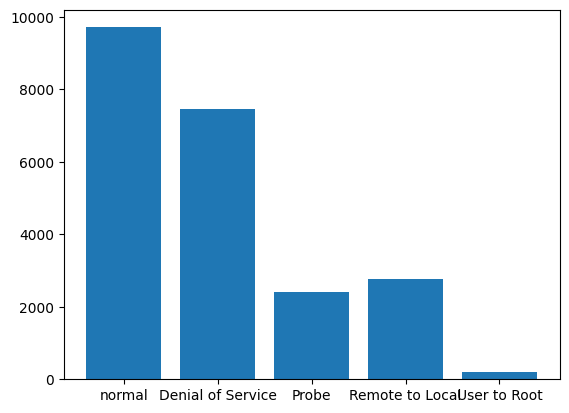

In [16]:
total_dos_count_test = count_value_sum(
    unique_test_set,
    "attack",
    [
        "smurf",
        "apache2",
        "neptune",
        "back",
        "teardrop",
        "land",
        "pod",
        "udpstorm",
        "processtable",
        "mailbomb",
    ],
)
total_r2l_count_test = count_value_sum(
    unique_test_set,
    "attack",
    [
        "warezmaster",
        "xlock",
        "snmpgetattack",
        "ftp_write",
        "phf",
        "imap",
        "xsnoop",
        "guess_passwd",
        "sendmail",
        "worm",
        "snmpguess",
        "named",
        "multihop",
    ],
)
total_u2r_count_test = count_value_sum(
    unique_test_set,
    "attack",
    [
        "rootkit",
        "buffer_overflow",
        "httptunnel",
        "perl",
        "sqlattack",
        "loadmodule",
        "ps",
        "xterm",
    ],
)
total_probe_count_test = count_value_sum(
    unique_test_set,
    "attack",
    [
        "saint",
        "mscan",
        "nmap",
        "satan",
        "ipsweep",
        "portsweep",
    ],
)
total_normal_count_test = unique_test_set["attack"].value_counts()["normal"].item()
attack_distribution_count_test = [
    total_normal_count_test,
    total_dos_count_test,
    total_probe_count_test,
    total_r2l_count_test,
    total_u2r_count_test,
]

print(f"Normal Count: {format(total_normal_count_test,',d')}")
print(f"DoS Count: {format(total_dos_count_test,',d')}")
print(f"U2R Count: {format(total_u2r_count_test,',d')}")
print(f"R2L Count: {format(total_r2l_count_test,',d')}")
print(f"Probe Count: {format(total_probe_count_test,',d')}")
plt.bar(attack_distribution_categories, attack_distribution_count_test)
plt.show()

## Unique values of train set

In [17]:
unique_train_set = train_set.select_dtypes(include=["object"])
unique_test_set.head()

,protocol_type,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,ftp_data,SF,normal
2,icmp,eco_i,SF,saint
3,tcp,telnet,RSTO,mscan
4,tcp,http,SF,normal


In [18]:
print("protocol_type: ")
unique_train_set_values_prtcl_type = unique_train_set["protocol_type"].unique().tolist()
print(f"Unique Values: {unique_train_set_values_prtcl_type}")
print(f"Unique Values Count: {len(unique_train_set_values_prtcl_type)}")
print("")
print("service: ")
unique_train_set_values_service = unique_train_set["service"].unique().tolist()
print(f"Unique Values: {unique_train_set_values_service}")
print(f"Unique Values Count: {len(unique_train_set_values_service)}")
print("")
print("flag: ")
unique_train_set_values_flag = unique_train_set["flag"].unique().tolist()
print(f"Unique Values: {unique_train_set_values_flag}")
print(f"Unique Values Count: {len(unique_train_set_values_flag)}")
print("")
print("attack: ")
unique_train_set_values_attack = unique_train_set["attack"].unique().tolist()
print(f"Unique Values: {unique_train_set_values_attack}")
print(f"Unique Values Count: {len(unique_train_set_values_attack)}")
print("")

protocol_type: 
Unique Values: ['udp', 'tcp', 'icmp']
Unique Values Count: 3

service: 
Unique Values: ['other', 'private', 'http', 'remote_job', 'ftp_data', 'name', 'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois', 'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i', 'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest']
Unique Values Count: 70

flag: 
Unique Values: ['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH']
Unique Values Count: 11

attack: 
Unique Values: ['normal', 'neptune', 'warezclient', 'ipswe

Normal Count: 67,342
DoS Count: 45,927
U2R Count: 52
R2L Count: 103
Probe Count: 11,656


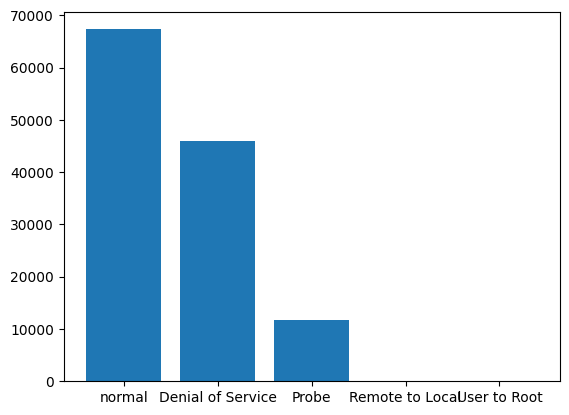

In [19]:
total_dos_count_train = count_value_sum(
    unique_train_set,
    "attack",
    [
        "smurf",
        "apache2",
        "neptune",
        "back",
        "teardrop",
        "land",
        "pod",
        "udpstorm",
        "processtable",
        "mailbomb",
    ],
)
total_r2l_count_train = count_value_sum(
    unique_train_set,
    "attack",
    [
        "warezmaster",
        "xlock",
        "snmpgetattack",
        "ftp_write",
        "phf",
        "imap",
        "xsnoop",
        "guess_passwd",
        "sendmail",
        "worm",
        "snmpguess",
        "named",
        "multihop",
    ],
)
total_u2r_count_train = count_value_sum(
    unique_train_set,
    "attack",
    [
        "rootkit",
        "buffer_overflow",
        "httptunnel",
        "perl",
        "sqlattack",
        "loadmodule",
        "ps",
        "xterm",
    ],
)
total_probe_count_train = count_value_sum(
    unique_train_set,
    "attack",
    [
        "saint",
        "mscan",
        "nmap",
        "satan",
        "ipsweep",
        "portsweep",
    ],
)
total_normal_count_train = unique_train_set["attack"].value_counts()["normal"].item()
attack_distribution_count_train = [
    total_normal_count_train,
    total_dos_count_train,
    total_probe_count_train,
    total_r2l_count_train,
    total_u2r_count_train,
]

print(f"Normal Count: {format(total_normal_count_train,',d')}")
print(f"DoS Count: {format(total_dos_count_train,',d')}")
print(f"U2R Count: {format(total_u2r_count_train,',d')}")
print(f"R2L Count: {format(total_r2l_count_train,',d')}")
print(f"Probe Count: {format(total_probe_count_train,',d')}")
plt.bar(attack_distribution_categories, attack_distribution_count_train)
plt.show()